In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#setting problem constants
p_i=2.64E-04 #cost of a VM ($/s)
p_n=3.50E-06 #cost of data transfer ($/KB)
H=8.50E-05 #static Hosting cost ($/s)
RPM=0.7 #revenue per 1000 ads ($)
R=100 #response time (ms)
gamma_l=1 #gamma lower bound (gamma is average number of ad banners per page)
gamma_u=25 #gamma upper bound
R_l=10 # respose time lower bound
R_u=3500 # response time upper bound
d_l=15 #capacity of each VM lower bound(request/s)
d_u=21 #capacity of each VM upper bound(request/s)

# Experiment 4
$$W_s = \frac{1}{3}$$
$$W_a = \frac{1}{3}$$
$$W_u = \frac{1}{3}$$

In [21]:
exp1 = pd.read_csv("../data/EXP-4.csv")

In [34]:
exp1.drop('_id',axis=1,inplace=True)

In [28]:
exp1.drop(exp1[exp1['cycle'].isna()].index,inplace=True)
exp1['cycle'] = exp1['cycle'].astype(int)
exp1.set_index('cycle',inplace=True)

In [46]:
exp1.sort_values('date',inplace=True)

In [51]:
exp1 = exp1.iloc[-823:]

In [55]:
exp1 = exp1.iloc[2:]

In [56]:
exp1['W'] = exp1['predicted_W'].apply(lambda x: 10 if x>10 else np.ceil(x))
exp1.fillna(method='ffill',inplace=True)

/home/nima/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/nima/.local/lib/python3.6/site-packages/pandas/core/frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [57]:
exp1

,requests,concurrent_users,arrival_rate,response_time,data_payload,predicted_p_s,predicted_W,predicted_gamma,date,W
cycle,,,,,,,,,,
3,400,50,91.11,548.769,589,0.002205,4.823787,4.176644,2020-09-17T19:25:25.975Z,5.0
4,300,30,90.31,332.207,589,0.002648,6.264030,4.389418,2020-09-17T19:26:31.621Z,7.0
5,160,20,91.72,218.050,589,0.002526,6.114836,4.304747,2020-09-17T19:27:37.819Z,7.0
6,100,10,95.92,104.252,589,0.002383,7.132200,4.428272,2020-09-17T19:28:41.292Z,8.0
7,100,20,94.40,211.872,589,0.002471,5.621236,4.199324,2020-09-17T19:29:45.665Z,6.0
...,...,...,...,...,...,...,...,...,...,...
819,100,20,86.29,231.769,589,0.002760,5.487025,4.315240,2020-09-18T18:33:45.091Z,6.0
820,20,5,64.91,77.030,589,0.002760,5.487025,4.315240,2020-09-18T18:34:53.448Z,6.0
821,1000,100,88.18,1134.012,589,0.002744,7.055136,4.383689,2020-09-18T18:36:07.330Z,8.0


## Number of containers

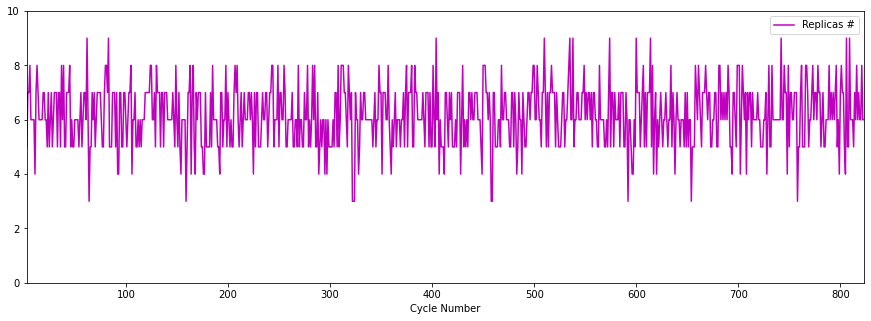

In [59]:
fig, ax = plt.subplots(figsize=(15,5)) # Create the figure and axes object
exp1['W'].plot(legend=True,label='Replicas #',color='m')
plt.xlabel('Cycle Number')
ax.set_ylim(0,10)
plt.savefig('exp4/replicas_number.png')

## Response time vs. Arrival rate

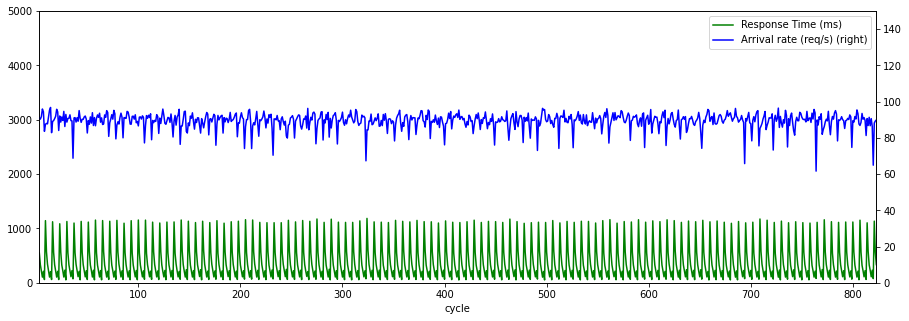

In [60]:
fig, ax = plt.subplots(figsize=(15,5))
exp1['response_time'].plot(legend=True,label='Response Time (ms)',color='g')
exp1['arrival_rate'].plot(legend=True,label='Arrival rate (req/s)',secondary_y=True,color='b')
ax.set_ylim(0,5000)
ax.right_ax.set_ylim([0,150])

plt.savefig('exp4/response_time_vs_arrival_rate.png')

## service price vs avg. number of ads

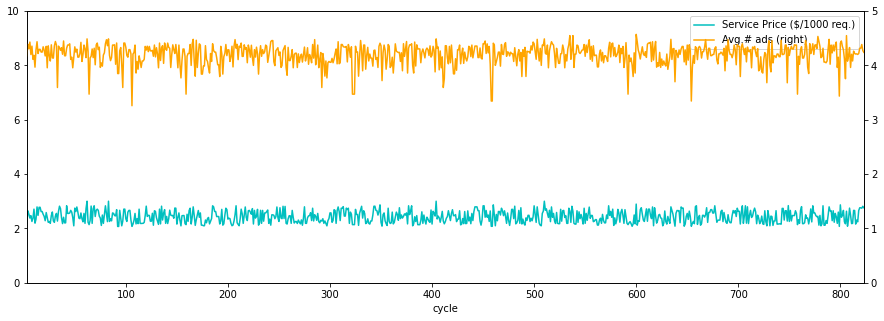

In [61]:
fig, ax = plt.subplots(figsize=(15,5)) # Create the figure and axes object
# plt.figure(num=None,)
# Plot the first x and y axes:
(exp1['predicted_p_s']*1000).plot(legend=True,label='Service Price ($/1000 req.)',color='c')
exp1['predicted_gamma'].plot(legend=True,label='Avg.# ads',secondary_y=True,color='orange')
ax.set_ylim(0,10)
ax.right_ax.set_ylim([0,5])
plt.savefig('exp4/service_price_vs_#_of_ads.png')

## Service profit vs. Client profit vs user satisfaction

In [63]:
exp1['service_profit'] = exp1['predicted_p_s']*exp1['arrival_rate'] - p_i*exp1['W'] - exp1['data_payload']*p_n*exp1['arrival_rate']
exp1['client_profit'] = (exp1['predicted_gamma']*RPM/1000 - H - exp1['predicted_p_s'])*exp1['arrival_rate']
exp1['user_satisfaction'] = 0.5*(gamma_u - exp1['predicted_gamma'])/(gamma_u-gamma_l) + 0.5*(R_u - exp1['response_time'])/(R_u - R_l)

/home/nima/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/nima/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/nima/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

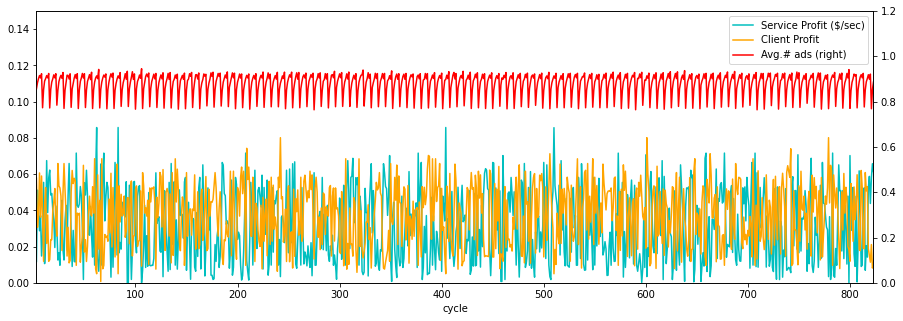

In [64]:
fig, ax = plt.subplots(figsize=(15,5)) # Create the figure and axes object
# plt.figure(num=None,)
# Plot the first x and y axes:
exp1['service_profit'].plot(legend=True,label='Service Profit ($/sec)',color='c')
exp1['client_profit'].plot(legend=True,label='Client Profit',color='orange')
exp1['user_satisfaction'].plot(legend=True,label='Avg.# ads',secondary_y=True,color='r')
ax.set_ylim(0,0.15)
ax.right_ax.set_ylim([0,1.2])
plt.savefig('exp4/service_profit_vs_client_profit_user_satisfaction.png')

In [65]:
exp1

,requests,concurrent_users,arrival_rate,response_time,data_payload,predicted_p_s,predicted_W,predicted_gamma,date,W,service_profit,client_profit,user_satisfaction
cycle,,,,,,,,,,,,,
3,400,50,91.11,548.769,589,0.002205,4.823787,4.176644,2020-09-17T19:25:25.975Z,5.0,0.011792,0.057694,0.856632
4,300,30,90.31,332.207,589,0.002648,6.264030,4.389418,2020-09-17T19:26:31.621Z,7.0,0.051112,0.030676,0.883226
5,160,20,91.72,218.050,589,0.002526,6.114836,4.304747,2020-09-17T19:27:37.819Z,7.0,0.040768,0.036889,0.901345
6,100,10,95.92,104.252,589,0.002383,7.132200,4.428272,2020-09-17T19:28:41.292Z,8.0,0.028698,0.060630,0.915075
7,100,20,94.40,211.872,589,0.002471,5.621236,4.199324,2020-09-17T19:29:45.665Z,6.0,0.037044,0.036233,0.904426
...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,100,20,86.29,231.769,589,0.002760,5.487025,4.315240,2020-09-18T18:33:45.091Z,6.0,0.058725,0.015123,0.899160
820,20,5,64.91,77.030,589,0.002760,5.487025,4.315240,2020-09-18T18:34:53.448Z,6.0,0.043782,0.011376,0.921329
821,1000,100,88.18,1134.012,589,0.002744,7.055136,4.383689,2020-09-18T18:36:07.330Z,8.0,0.058107,0.021090,0.768473
